# checkpoint4

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('house.csv')

In [3]:
print(df)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


data preprocessing: finding the missing values 


since we are not going to work with ( date , ID,lat,long,zipcode),let's drop them from the dataFrame , in order chose well our  features !


In [8]:
df.drop(columns = ['id', 'zipcode', 'lat', 'long', 'date'], inplace = True)

In [9]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

we conclue that there are no missing values to be traited ,So the next step is visualizing our data!

data visualization :

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

Now it is easier forus  to chose our features to build a predictive model, we are going to split our dataset into a training set and a testing set. The surface-related variables (sqtf_living, sqft_lot...etc) and the ordinal variables (floors, bathrooms... etc.) are on very different scales(balence). we need to scale the data before the training .

if wev Look at the correlation between the predictors and the target variable, we see that sqft_living and grade are the most correlated variables.

Build the following three linear regression models and compare their R^2 and model coefficients.

In [16]:
print("correlation")
print(df.corr()[['price','sqft_living', 'grade']].sort_values(by = 'price'))
y = df.price

X = df[['sqft_living']].values.reshape(-1,1)
model = LinearRegression().fit(X,y)
print("M1: R^2: {:.4f} coef: {}".format(model.score(X,y), model.coef_))


X = df[['grade']].values.reshape(-1,1)
model = LinearRegression().fit(X,y)
print("M2: R^2: {:.4f} coef: {}".format(model.score(X,y), model.coef_))

X = df[['sqft_living', 'grade']]
model = LinearRegression().fit(X,y)
print("M3: R^2: {:.4f} coef: {}".format(model.score(X,y), model.coef_))




correlation
                  price  sqft_living     grade
condition      0.036362    -0.058753 -0.144674
yr_built       0.054012     0.318049  0.446963
sqft_lot15     0.082447     0.183286  0.119248
sqft_lot       0.089661     0.172826  0.113621
yr_renovated   0.126434     0.055363  0.014414
floors         0.256794     0.353949  0.458183
waterfront     0.266369     0.103818  0.082775
bedrooms       0.315438     0.591471  0.366509
sqft_basement  0.323816     0.435043  0.168392
view           0.397293     0.284611  0.251321
bathrooms      0.525650     0.755328  0.665127
sqft_living15  0.585379     0.756420  0.713202
sqft_above     0.605567     0.876597  0.755923
grade          0.667434     0.762704  1.000000
sqft_living    0.702035     1.000000  0.762704
price          1.000000     0.702035  0.667434
M1: R^2: 0.4929 coef: [280.6235679]
M2: R^2: 0.4455 coef: [208457.56245838]
M3: R^2: 0.5345 coef: [  184.42020584 98554.7981385 ]


The sqft_living and grade variables are indeed highly correlated.

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

def rmse(y_pred, y_true):
    return(np.sqrt( mean_squared_error(y_pred, y_true)))

In [20]:
df = pd.read_csv('house.csv')

predictors = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_living15','sqft_lot15',]

# store the score for each  random_state
scores = []
# random state values
for seed in range(0,40, 1):
    # split the dataset train (90%), test (10%)
    X_train, X_test, y_train, y_test = train_test_split(
        df[predictors],
        df.price,
        test_size=0.10,
        random_state=seed)
    # fit a linear regression model
    model = LinearRegression().fit(X_train,y_train)
    # predicted values for the test set
    yhat = model.predict(X_test)
    # record the scores
    scores.append({
        'seed': seed,
        'rmse': np.sqrt(mean_squared_error(yhat, y_test)),
    })


scores = pd.DataFrame(scores).sort_values(by = 'rmse').reset_index()


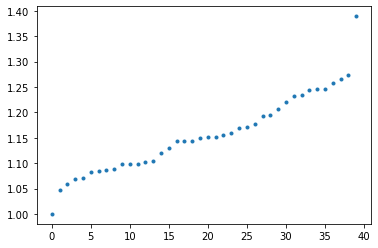

In [21]:
plt.plot(scores.rmse/np.min(scores.rmse), '.')

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [38]:
x=df["price"].values[:,np.newaxis]
y=df["sqft_living"].values


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression()   #build linear regression model
model.fit(x_train,y_train)  #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance


print("MSE", mean_squared_error(y_test,predicted))

print("R squared", metrics.r2_score(y_test,predicted))

MSE 419107.76546734595
R squared 0.49875223400847035


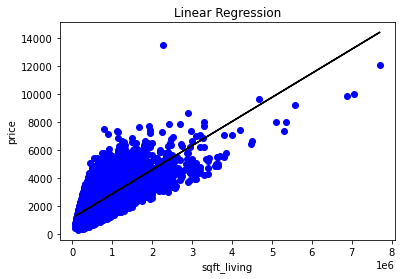

In [39]:
plt.scatter(x,y,color="b")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x,model.predict(x),color="k")
plt.show()

In [41]:
df["grade"]

0        7
1        7
2        6
3        7
4        8
        ..
21608    8
21609    8
21610    7
21611    8
21612    7
Name: grade, Length: 21613, dtype: int64

 multi-linear regression :
 

In [43]:
#extract x and y from our data
x=df[["sqft_living","grade"]]  #we have more than one input
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 57413775762.86427
R squared 0.5433112989852685


so feeding the the algorithm with more thean one input(features : grade+sqft_living) makes it work better , so the multi-linear regression is better more performant than the linear model one .

Polynomial regression:

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 


In [50]:
x= df[["sqft_living", "grade"]]
y= df["price"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=40)  #splitting data
lg=LinearRegression()
poly=PolynomialFeatures(degree=3)

x_train_fit = poly.fit_transform(x_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(x_test)
predicted = lg.predict(x_test_)

print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  50395735068.48757
R squared:  0.5991351817694501


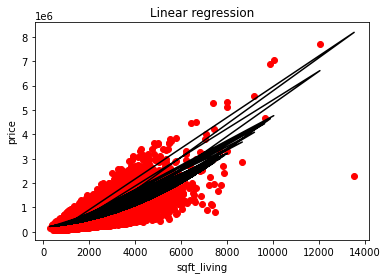

In [53]:
x= df["sqft_living"].values.reshape(-1,1)
y= df["price"].values
poly = PolynomialFeatures(degree = 2) 
x_poly = poly.fit_transform(x) 
poly.fit(x_poly, y) 
lg=LinearRegression()
lg.fit(x_poly, y) 

plt.scatter(x, y, color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x, lg.predict(poly.fit_transform(x)), color="k") 